# Electric Vehicle Sales Analysis

Analysis of global EV sales trends from 2010-2023

## Sections
1. Data Loading and Inspection
2. Data Cleaning
3. Exploratory Analysis
4. Visualization
5. Insights

In [13]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
# Read the CSV file
df = pd.read_csv('../data/ev_sales_data.csv')

In [15]:
# Display first few rows
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [16]:
# Get dataset information
df.info()

# Basic statistical summary
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      3798 non-null   object 
 1   category    3798 non-null   object 
 2   parameter   3798 non-null   object 
 3   mode        3798 non-null   object 
 4   powertrain  3798 non-null   object 
 5   year        3798 non-null   int64  
 6   unit        3798 non-null   object 
 7   value       3798 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 237.5+ KB


,year,value
count,3798.000000,3.798000e+03
mean,2017.369932,1.009542e+05
std,3.809226,8.184402e+05
min,2010.000000,1.500000e-05
25%,2014.000000,2.300000e+00
50%,2018.000000,1.900000e+02
75%,2021.000000,6.800000e+03
max,2023.000000,2.800000e+07


In [17]:
# View column names
print("Columns:", df.columns.tolist())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

Columns: ['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit', 'value']

Missing values:
 region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64


In [18]:
# 1. View first few rows
print("First few rows of data:")
df.head()

# 2. Get basic information
print("\nDataset Information:")
df.info()

# 3. Check missing values
print("\nMissing values:")
df.isnull().sum()

# 4. Basic statistics
print("\nStatistical Summary:")
df.describe()

First few rows of data:

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      3798 non-null   object 
 1   category    3798 non-null   object 
 2   parameter   3798 non-null   object 
 3   mode        3798 non-null   object 
 4   powertrain  3798 non-null   object 
 5   year        3798 non-null   int64  
 6   unit        3798 non-null   object 
 7   value       3798 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 237.5+ KB

Missing values:

Statistical Summary:


,year,value
count,3798.000000,3.798000e+03
mean,2017.369932,1.009542e+05
std,3.809226,8.184402e+05
min,2010.000000,1.500000e-05
25%,2014.000000,2.300000e+00
50%,2018.000000,1.900000e+02
75%,2021.000000,6.800000e+03
max,2023.000000,2.800000e+07


In [19]:
# Let's see what unique parameters we have
print("Unique parameters in our dataset:")
print(df['parameter'].unique())

# Create separate dataframes for different parameters
sales_df = df[df['parameter'] == 'EV sales']
stock_df = df[df['parameter'] == 'EV stock']
sales_share_df = df[df['parameter'] == 'EV sales share']
stock_share_df = df[df['parameter'] == 'EV stock share']

# Look at statistics for sales numbers (actual vehicles)
print("\nEV Sales Statistics (number of vehicles):")
print(sales_df['value'].describe())

# Look at statistics for sales share (percentages)
print("\nEV Sales Share Statistics (percentages):")
print(sales_share_df['value'].describe())

Unique parameters in our dataset:
['EV sales' 'EV stock share' 'EV sales share' 'EV stock'
 'Electricity demand' 'Oil displacement Mbd'
 'Oil displacement, million lge']

EV Sales Statistics (number of vehicles):
count    1.342000e+03
mean     7.571890e+04
std      4.682545e+05
min      1.000000e+00
25%      8.300000e+01
50%      1.100000e+03
75%      1.200000e+04
max      9.500000e+06
Name: value, dtype: float64

EV Sales Share Statistics (percentages):
count    603.000000
mean       5.778701
std       12.326818
min        0.000120
25%        0.140000
50%        0.900000
75%        4.950000
max       93.000000
Name: value, dtype: float64


In [20]:
# Let's see what unique parameters we have
print("Unique parameters in our dataset:")
print(df['parameter'].unique())

Unique parameters in our dataset:
['EV sales' 'EV stock share' 'EV sales share' 'EV stock'
 'Electricity demand' 'Oil displacement Mbd'
 'Oil displacement, million lge']


In [21]:
# Group parameters into Vehicle Numbers
vehicle_metrics_df = df[df['parameter'].isin(['EV sales', 'EV stock'])]

In [22]:
# Group parameters into Market Share Metrics
share_metrics_df = df[df['parameter'].isin(['EV sales share', 'EV stock share'])]


In [23]:
# Group parameters into Environmental Impact
impact_metrics_df = df[df['parameter'].isin(['Electricity demand', 'Oil displacement Mbd', 'Oil displacement, million lge'])]

In [27]:
# Vehicles sales analysis
# Filter for just EV sales data
sales_by_year_df = df[df['parameter'] == 'EV sales'].groupby('year')['value'].sum().reset_index()


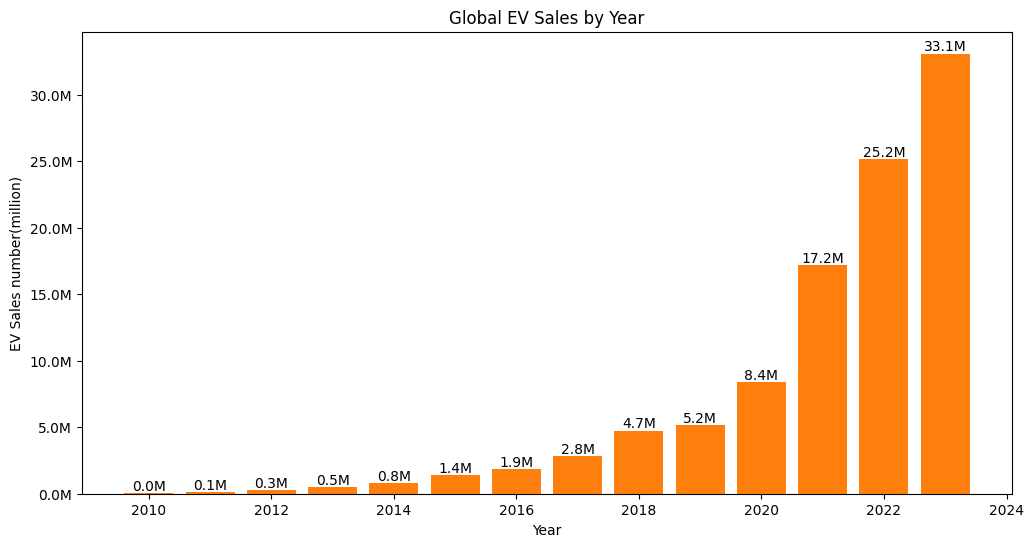

In [42]:
# draw bar chat to see the result
plt.figure(figsize=(12, 6))
plt.bar(sales_by_year_df['year'],sales_by_year_df['value'])
plt.title('Global EV Sales by Year')
plt.xlabel('Year')
plt.ylabel('EV Sales number(million)')
# Converts large number to 1M to read
plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, p: f'{x/1000000:.1f}M')
)
# Create bar plot and store the bars
bars = plt.bar(sales_by_year_df['year'], sales_by_year_df['value'])
# Add value labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.,  # X position (center of bar)
             height,                              # Y position (top of bar)
             f'{height/1e6:.1f}M',               # Text (value in millions)
             ha='center',                         # Horizontal alignment
             va='bottom')  

plt.show()